## Heart Disease Model


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import precision_score,f1_score,recall_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import RocCurveDisplay,roc_curve,auc
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV,cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier




## Data Dictionary
* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
* The names and social security numbers of the patients were recently removed from the database, replaced with dummy values

In [4]:
df=pd.read_csv("./data/heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df["target"].value_counts()

target
1    526
0    499
Name: count, dtype: int64

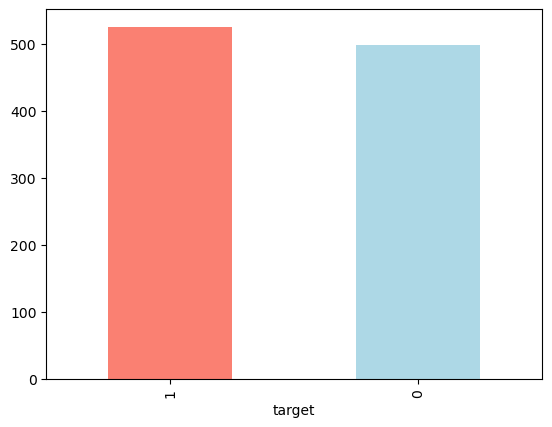

In [9]:
df["target"].value_counts().plot(kind="bar",color=["Salmon","LightBlue"]);

In [11]:
df.shape

(1025, 14)

In [12]:
df.sex.value_counts()

sex
1    713
0    312
Name: count, dtype: int64

In [13]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,86,413
1,226,300


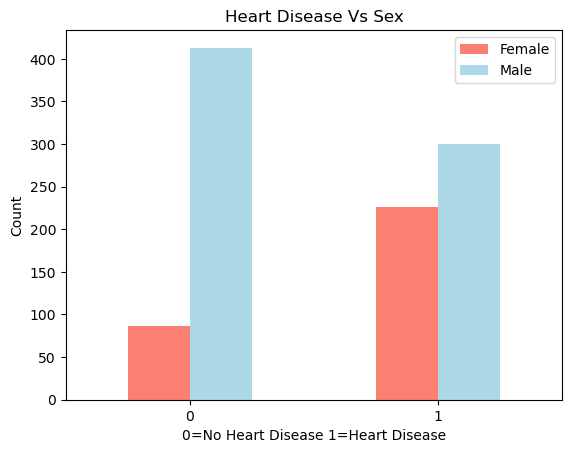

In [24]:
pd.crosstab(df.target,df.sex).plot(kind="bar",color=["salmon","lightblue"]);
plt.title("Heart Disease Vs Sex");
plt.xlabel("0=No Heart Disease 1=Heart Disease");
plt.ylabel("Count");
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);

In [25]:
df.thalach.value_counts()

thalach
162    35
160    31
163    29
173    28
152    28
       ..
194     3
185     3
106     3
88      3
113     3
Name: count, Length: 91, dtype: int64

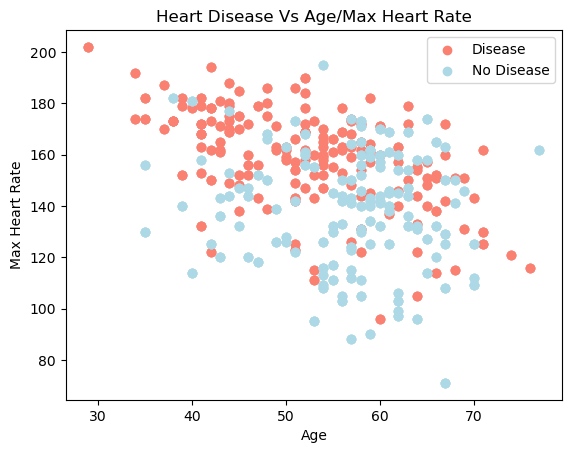

In [31]:
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],color="salmon");
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],color="lightblue")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.title("Heart Disease Vs Age/Max Heart Rate");
plt.legend(["Disease","No Disease"]);

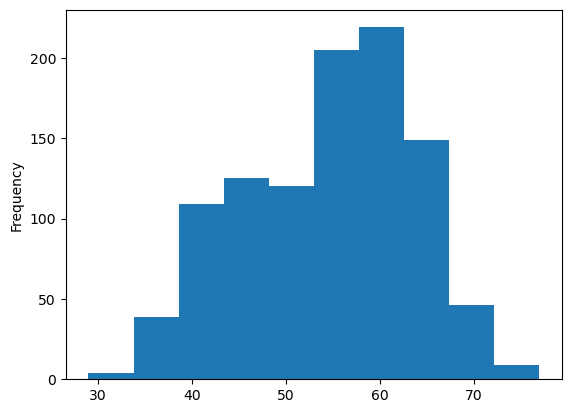

In [33]:
df.age.plot.hist();

In [34]:
pd.crosstab(df.target,df.cp)

cp,0,1,2,3
target,,,,
0,375,33,65,26
1,122,134,219,51


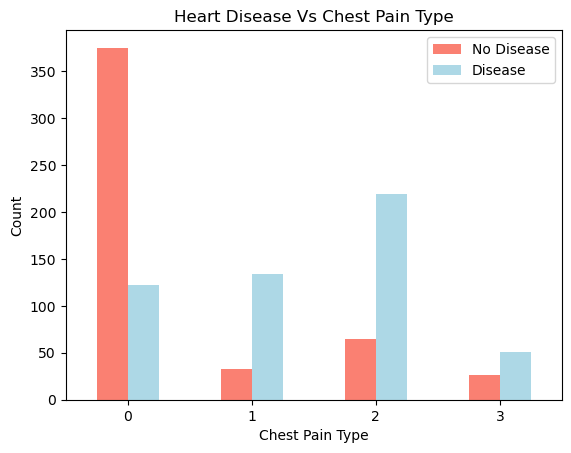

In [40]:
pd.crosstab(df.cp,df.target).plot(kind="bar",color=["salmon","lightblue"]);
plt.legend(["No Disease","Disease"]);
plt.xlabel("Chest Pain Type")
plt.ylabel("Count");
plt.xticks(rotation=0);
plt.title("Heart Disease Vs Chest Pain Type");

In [41]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


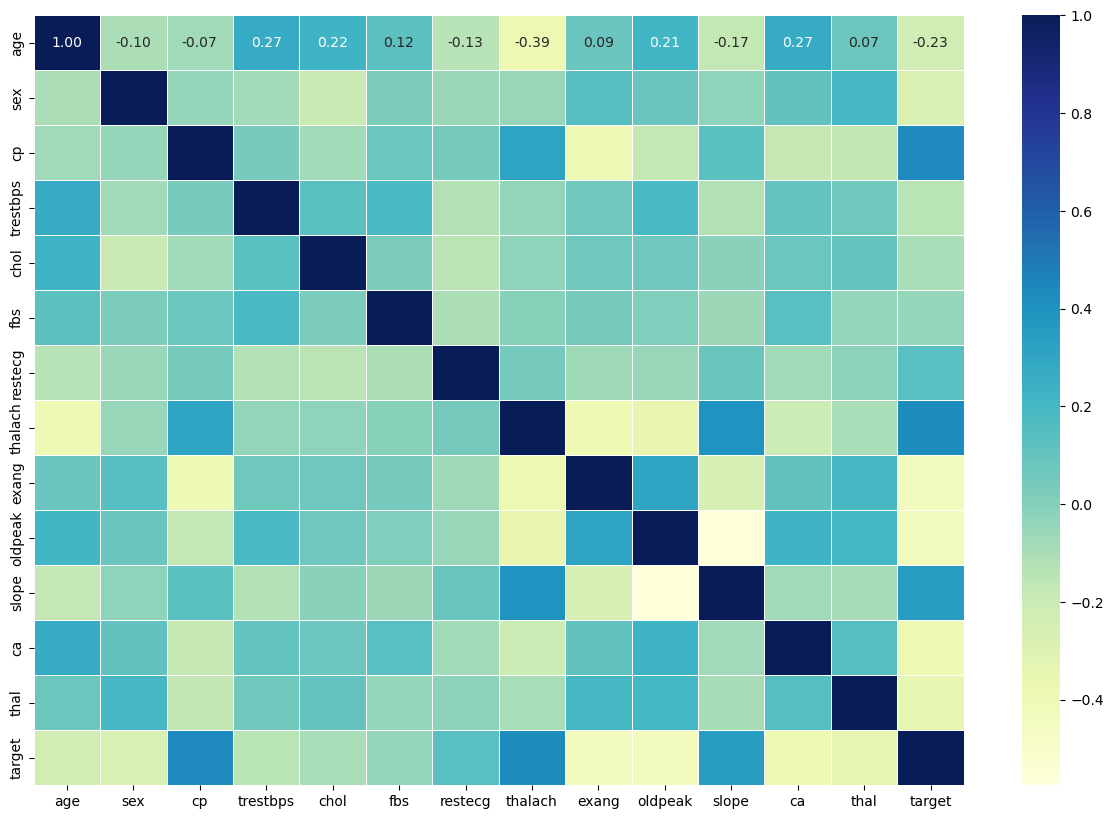

In [53]:
corr_mat=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_mat,annot=True,cmap="YlGnBu",linewidths=0.5,fmt=".2f");

In [57]:
X=df.drop("target",axis=1)
y=df["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [82]:
models={"LogisticRegression":LogisticRegression(),"KNN":KNeighborsClassifier(),"RandomForestClass":RandomForestClassifier()}
def model_scorer(models,X_test,X_train,y_train,y_test):
    model_score={}
    np.random.seed(42)
    for name,model in list(models.items()):
        model.fit(X_train,y_train)
        model_score[name]=model.score(X_test,y_test)
    return model_score

In [84]:
# model_score=model_scorer(models,X_train,X_test,y_train,y_test)
# model_score

In [74]:
model=LogisticRegression()
model.fit(X_train,y_train)
m=model.score(X_test,y_test)
m

D:\ml\milestone_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8536585365853658

In [75]:
model_1=KNeighborsClassifier()
model_1.fit(X_train,y_train)
m1=model_1.score(X_test,y_test)
m1

0.7414634146341463

In [76]:
model_2=RandomForestClassifier()
model_2.fit(X_train,y_train)
m2=model_2.score(X_test,y_test)
m2

1.0

In [77]:
score_df=pd.DataFrame({"LR":m,"KNN":m1,"RFC":m2},index=["accuracy"])
score_df

,LR,KNN,RFC
accuracy,0.853659,0.741463,1.0


<Axes: >

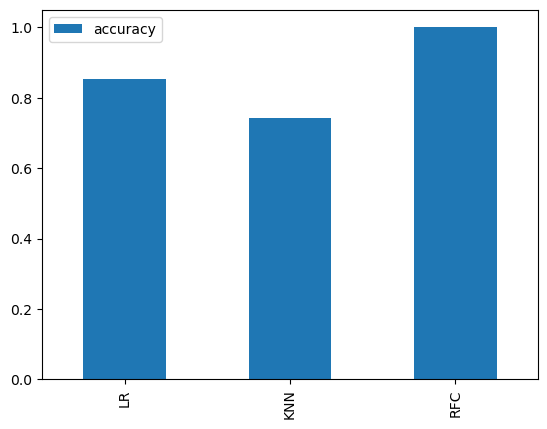

In [102]:
score_df.T.plot(kind="bar")

## Hyperparameter Tuning

In [85]:
# KNN tuning
knn=KNeighborsClassifier()
neighbors=range(1,21)
train_scores=[]
test_scores=[]
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
test_scores,train_scores
    

([1.0,
  0.9365853658536586,
  0.8975609756097561,
  0.8,
  0.7414634146341463,
  0.7560975609756098,
  0.7317073170731707,
  0.7219512195121951,
  0.7219512195121951,
  0.7414634146341463,
  0.7268292682926829,
  0.7121951219512195,
  0.7073170731707317,
  0.7268292682926829,
  0.7170731707317073,
  0.7365853658536585,
  0.7268292682926829,
  0.7268292682926829,
  0.697560975609756,
  0.7024390243902439],
 [1.0,
  0.9926829268292683,
  0.9878048780487805,
  0.9402439024390243,
  0.9170731707317074,
  0.8317073170731707,
  0.7975609756097561,
  0.7975609756097561,
  0.7682926829268293,
  0.7865853658536586,
  0.7804878048780488,
  0.7621951219512195,
  0.751219512195122,
  0.7536585365853659,
  0.7536585365853659,
  0.7585365853658537,
  0.7475609756097561,
  0.7548780487804878,
  0.7402439024390244,
  0.7219512195121951])

100.0

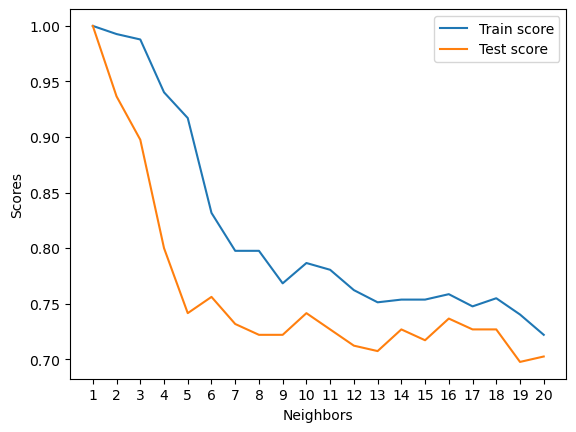

In [89]:
plt.plot(neighbors,train_scores,label="Train score")
plt.plot(neighbors,test_scores,label="Test score")
plt.xlabel("Neighbors")
plt.ylabel("Scores")
plt.xticks(np.arange(1,21))
plt.legend();
max(test_scores)*100

## HyperParameter Tuning using RandomizedSearchCV

In [90]:
log_reg_grid={"C":np.logspace(-4,4,20),"solver":["liblinear"]}
rf_grid={"n_estimators":np.arange(10,1000,50),"max_depth":[None,3,5,10],"min_samples_split":np.arange(2,20,2),"min_samples_leaf":np.arange(1,20,2)}

In [92]:
rs_log_reg=RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,cv=5,verbose=2,n_iter=20)
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, sol

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=2)

In [93]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.08858667904100823}

In [94]:
rs_log_reg.score(X_test,y_test)

0.8585365853658536

In [95]:
rs_rf=RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,cv=5,verbose=2,n_iter=20)
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=8, n_estimators=260; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=8, n_estimators=260; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=8, n_estimators=260; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=8, n_estimators=260; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=8, n_estimators=260; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=4, n_estimators=660; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=4, n_estimators=660; total time=   1.3s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=4, n_estimators=660; total time=   1.5s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=4, n_estimators=660; total time=   1.4s
[CV] END max_depth=1

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=2)

In [96]:
rs_rf.best_params_

{'n_estimators': 760,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_depth': 10}

In [97]:
rs_rf.score(X_test,y_test)

0.9853658536585366

## HyperParameter Tuning using GridSearchCV

In [98]:
log_reg_grid_gs={"C":np.logspace(-4,4,30),"solver":["liblinear"]}
gs_log_reg=GridSearchCV(LogisticRegression(),param_grid=log_reg_grid_gs,cv=5,verbose=True)
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [99]:
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [100]:
gs_log_reg.score(X_test,y_test)

0.8585365853658536

## Evaluating our Model

In [118]:
y_preds=gs_log_reg.predict(X_test)

In [119]:
confusion_matrix(y_test,y_preds)

array([[87, 21],
       [ 8, 89]], dtype=int64)

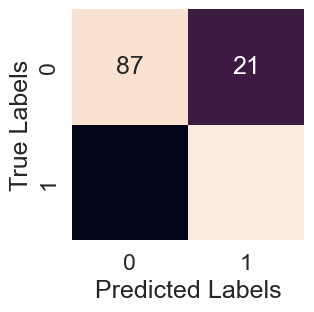

In [126]:
sns.set(font_scale=1.5)
fig,ax=plt.subplots(figsize=(3,3))
ax=sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels");

In [130]:
y_probs=gs_log_reg.predict_proba(X_test)
y_probs[:10]

array([[0.99551877, 0.00448123],
       [0.06204478, 0.93795522],
       [0.99025539, 0.00974461],
       [0.43803924, 0.56196076],
       [0.52233406, 0.47766594],
       [0.10347072, 0.89652928],
       [0.91417565, 0.08582435],
       [0.31031551, 0.68968449],
       [0.94698579, 0.05301421],
       [0.3299385 , 0.6700615 ]])

In [131]:
y_probs_pos=y_probs[:,1]
y_probs_pos[:10]

array([0.00448123, 0.93795522, 0.00974461, 0.56196076, 0.47766594,
       0.89652928, 0.08582435, 0.68968449, 0.05301421, 0.6700615 ])

In [140]:
fpr,tpr,thresholds=roc_curve(y_test,y_probs_pos)
roc_auc=auc(fpr,tpr)

In [141]:
display=RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc)

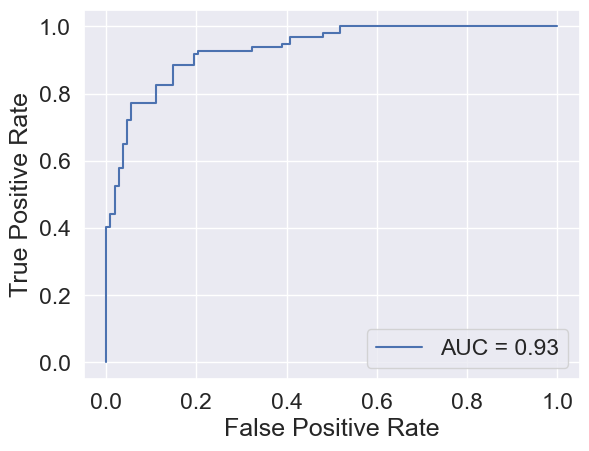

In [142]:
display.plot();

In [143]:
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [144]:
clf=LogisticRegression(C= 0.1082636733874054,solver='liblinear')

In [146]:
cv_acc=cross_val_score(clf,X,y,scoring="accuracy")
cv_acc=np.mean(cv_acc)
cv_acc

0.8439024390243903

In [148]:
cv_prec=cross_val_score(clf,X,y,scoring="precision")
cv_prec=np.mean(cv_prec)
cv_prec

0.8125800927658512

In [149]:
cv_rec=cross_val_score(clf,X,y,scoring="recall")
cv_rec=np.mean(cv_rec)
cv_rec

0.9050314465408805

In [150]:
cv_f1=cross_val_score(clf,X,y,scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.8562599401855499

In [152]:
cv_scoring=pd.DataFrame({"Accuracy":cv_acc,"Precision":cv_prec,"Recall":cv_rec,"F1":cv_f1},index=[0])

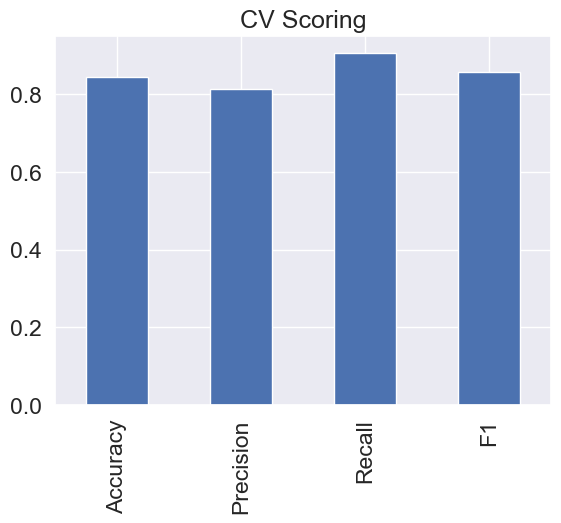

In [154]:
cv_scoring.T.plot.bar(title="CV Scoring",legend=False);

In [155]:
clf=LogisticRegression(C= 0.1082636733874054,solver='liblinear')

In [156]:
clf.fit(X_train,y_train)

LogisticRegression(C=0.1082636733874054, solver='liblinear')

In [157]:
clf.coef_

array([[ 0.01005509, -1.16684997,  0.71715483, -0.01681297, -0.00467679,
        -0.06071677,  0.2128974 ,  0.03162203, -0.63860099, -0.50108423,
         0.39411313, -0.64123691, -0.60144133]])

In [159]:
features_dict=dict(zip(df.columns,list(clf.coef_[0])))
features_dict

{'age': 0.01005508922627877,
 'sex': -1.166849966434072,
 'cp': 0.7171548289806498,
 'trestbps': -0.016812972668027195,
 'chol': -0.004676790000629948,
 'fbs': -0.060716766025901384,
 'restecg': 0.2128974012557873,
 'thalach': 0.03162203308600026,
 'exang': -0.6386009879233829,
 'oldpeak': -0.5010842257220439,
 'slope': 0.394113133493012,
 'ca': -0.6412369110596389,
 'thal': -0.6014413335264878}

In [165]:
features_df=pd.DataFrame(features_dict,index=[0])
features_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.010055,-1.16685,0.717155,-0.016813,-0.004677,-0.060717,0.212897,0.031622,-0.638601,-0.501084,0.394113,-0.641237,-0.601441


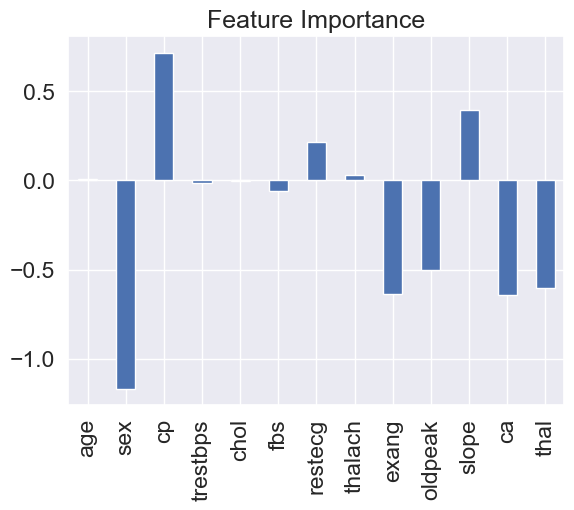

In [167]:
features_df.T.plot.bar(title="Feature Importance",legend=False);#Similar to Correlation Matrix